# Flood Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
data=pd.read_csv("/content/drive/My Drive/Flood Prediction/train.csv")
test=pd.read_csv("/content/drive/My Drive/Flood Prediction/test.csv")

In [6]:
#Head of the Data
data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [7]:
#Shape of the data
data.shape

(1117957, 22)

Shape indicates that there are 22 features and 1117957 observations

In [8]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Among the 22 features 21 features are integer type and 1 feature is float type

In [9]:
#Feature Names
data.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

Here's a general explanation for each feature in flood prediction dataset:

MonsoonIntensity: This likely measures the strength or amount of rainfall during the monsoon season. High intensity could increase the risk of flooding.

TopographyDrainage: This feature refers to the land’s shape and how effectively it can drain water. Poor drainage due to flat or low-lying topography can contribute to flooding.

RiverManagement: This involves the strategies and infrastructure used to control and manage river flows. Effective river management can help prevent flooding, while poor management can exacerbate flood risks.

Deforestation: The loss of forests can reduce the land’s ability to absorb rainfall, leading to increased runoff and a higher risk of flooding.

Urbanization: The development of land for residential or commercial purposes can increase impervious surfaces (like roads and buildings), leading to higher runoff and flooding.

ClimateChange: This feature refers to the long-term changes in climate patterns, such as increased rainfall or rising temperatures, which can influence flood risks.

DamsQuality: The structural integrity and maintenance of dams. Poor-quality or deteriorating dams can fail and cause significant flooding downstream.

Siltation: The accumulation of silt in rivers or reservoirs, which can reduce their capacity and increase the risk of flooding.

AgriculturalPractices: The methods and practices used in agriculture, such as the type of crops and land management techniques, can impact runoff and soil absorption.

Encroachments: Unauthorized or illegal construction in floodplains or near rivers can obstruct natural water flow and increase flood risk.

IneffectiveDisasterPreparedness: The level of readiness and response measures in place for dealing with floods. Poor preparedness can lead to more severe impacts during a flood event.

DrainageSystems: The network of drains and sewers designed to remove excess water from urban areas. Ineffective or poorly maintained drainage systems can lead to localized flooding.

CoastalVulnerability: This feature assesses the susceptibility of coastal areas to flooding, often influenced by factors such as sea level rise and storm surges.

Landslides: The occurrence of landslides can contribute to flooding by blocking rivers or creating debris flows that affect water flow.

Watersheds: The area of land that drains into a particular river or lake. The characteristics of a watershed can influence how water is collected and managed.

DeterioratingInfrastructure: The condition of infrastructure such as roads, bridges, and flood barriers. Poorly maintained infrastructure can increase flood risk.

PopulationScore: This likely represents the density or distribution of the population in an area. High population density can exacerbate the impacts of flooding.

WetlandLoss: The reduction of wetlands, which play a crucial role in absorbing excess water and mitigating flood risks. Loss of wetlands can increase flood susceptibility.

InadequatePlanning: The lack of effective urban or land use planning that considers flood risks. Poor planning can lead to increased vulnerability to flooding.

PoliticalFactors: This could involve the influence of government policies, regulations, or political stability on flood management and preparedness.

FloodProbability: The likelihood or chance of a flood occurring in a given area, based on the combination of all other features and historical data.

In [10]:
#Dropping ID since is not useful for analysis
data.drop('id',axis=1,inplace=True)

In [11]:
#Checking for Missing Values
data.isna().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


There are no missing observations in the data

# EDA

In [ ]:
#Summary Measures of the data
pd.set_option('display.max_columns', None)
np.round(data.describe(),2)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00
mean,4.92,4.93,4.96,4.94,4.94,4.93,4.96,4.93,4.94,4.95,4.95,4.95,4.95,4.93,4.93,4.93,4.93,4.95,4.94,4.94,0.50
std,2.06,2.09,2.07,2.05,2.08,2.06,2.08,2.07,2.07,2.08,2.08,2.07,2.09,2.08,2.08,2.06,2.07,2.07,2.08,2.09,0.05
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28
25%,3.00,3.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,0.47
50%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.50
75%,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,0.54
max,16.00,18.00,16.00,17.00,17.00,17.00,16.00,16.00,16.00,18.00,16.00,17.00,17.00,16.00,16.00,17.00,18.00,19.00,16.00,16.00,0.72


From the above table of measures it is to be noted that all the features except flood probability has almost similar values for mean,std,min,50% and 75% .

In [ ]:
#Summary Measures after converting the data into objective type
data_object = data.astype(object)
pd.set_option('display.max_columns', None)
data_object.describe(include="object")

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957.00
unique,17,19,17,18,18,18,17,17,17,19,17,18,18,17,17,18,19,20,17,17,83.00
top,5,5,5,4,5,5,5,5,5,5,4,5,5,5,5,4,4,4,5,4,0.49
freq,220936,221252,218216,219733,216722,218995,218237,222270,216644,219971,217365,217753,215378,213811,219756,218713,221136,217045,217756,215557,43320.00


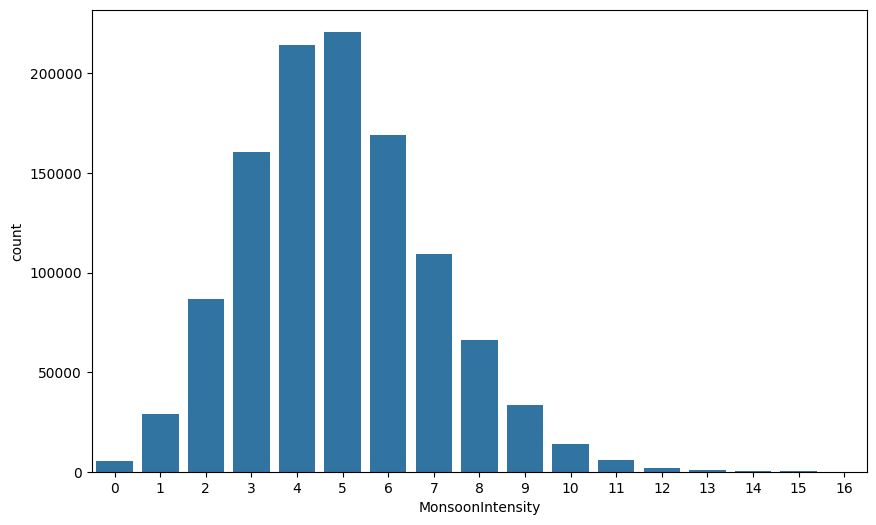

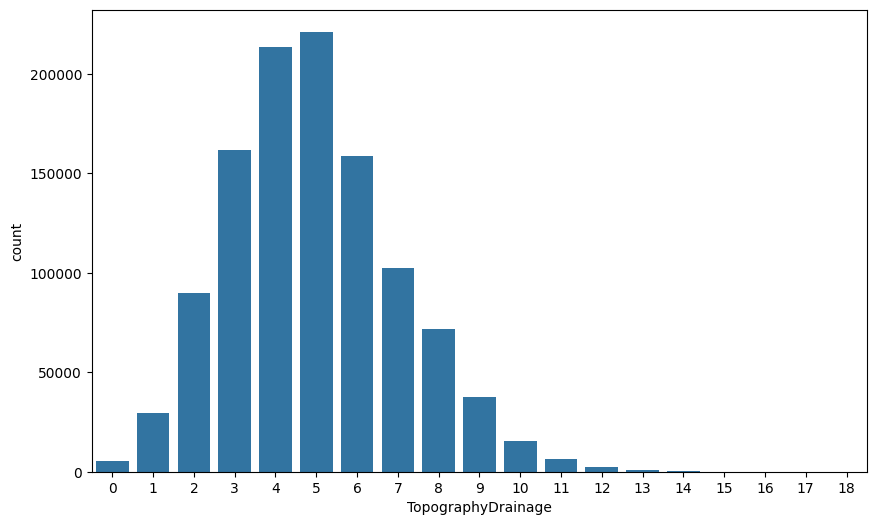

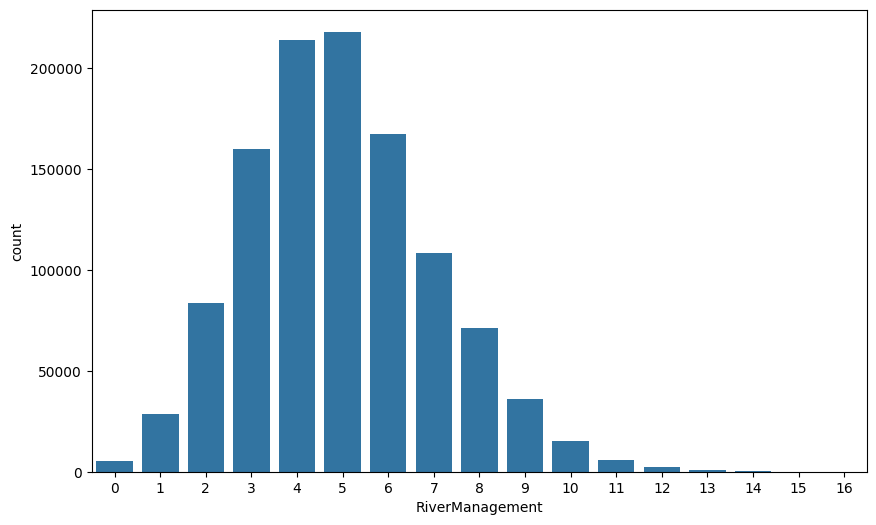

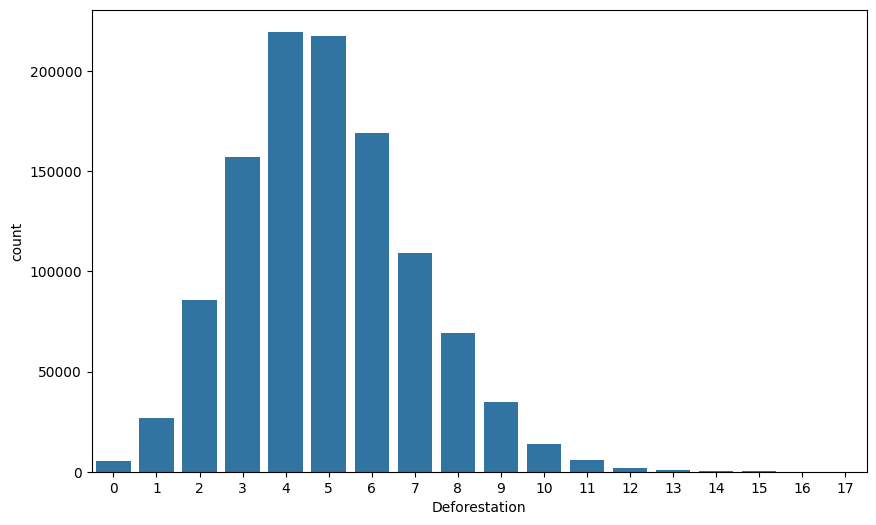

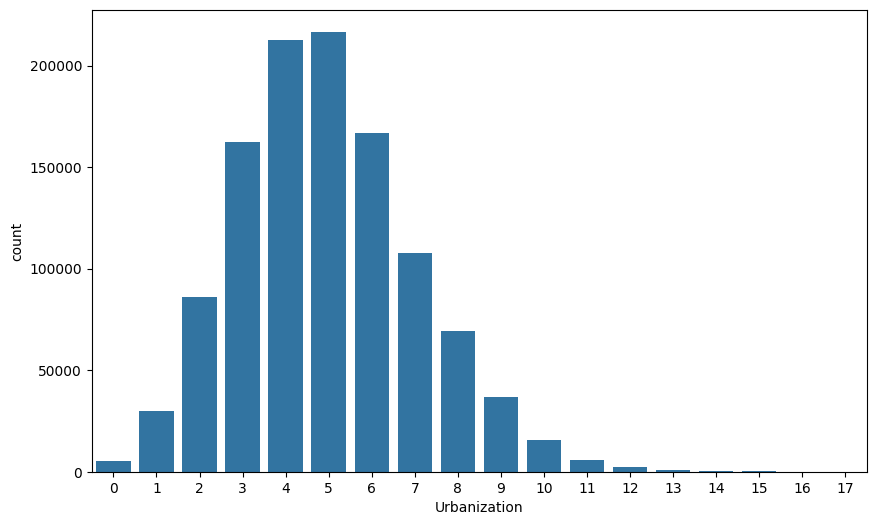

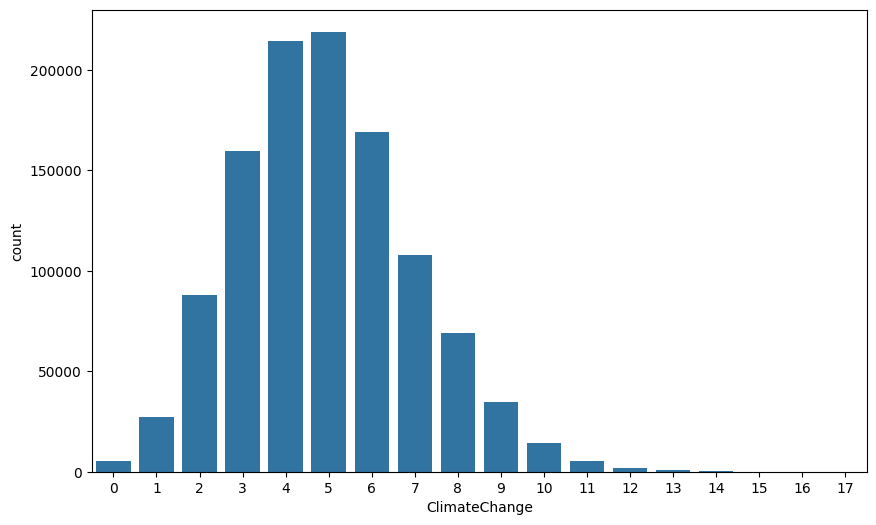

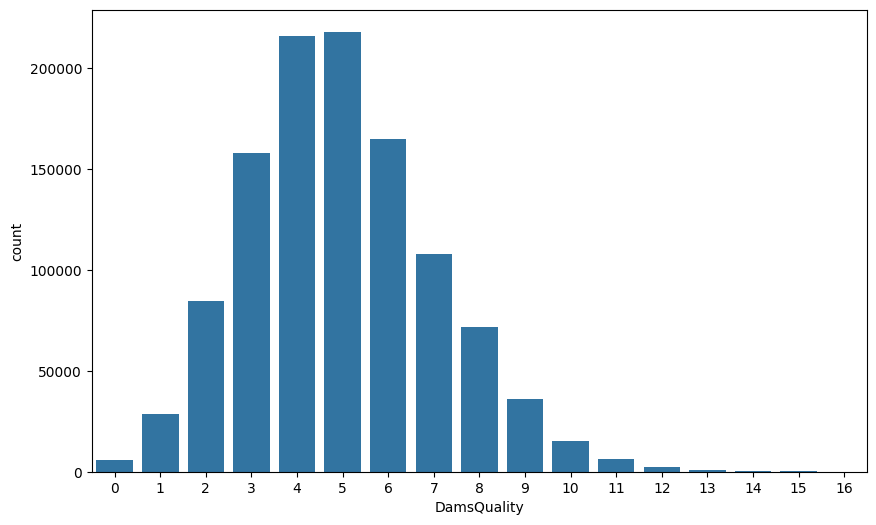

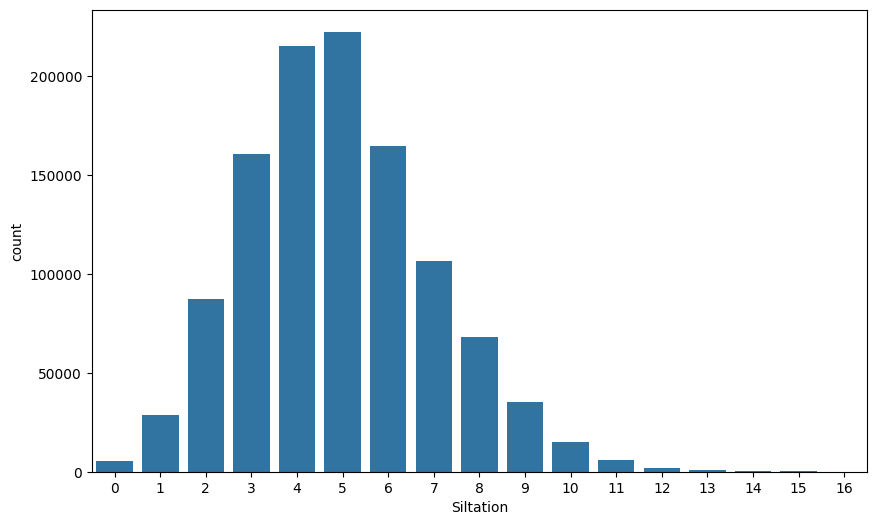

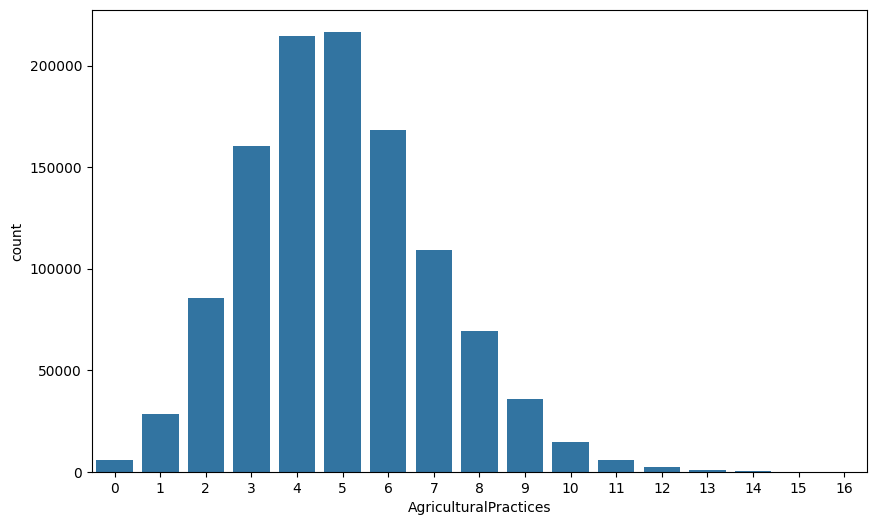

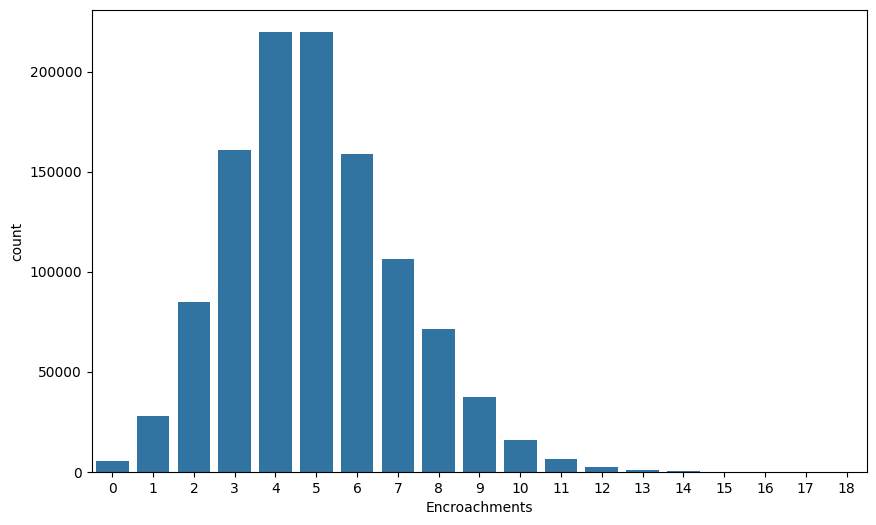

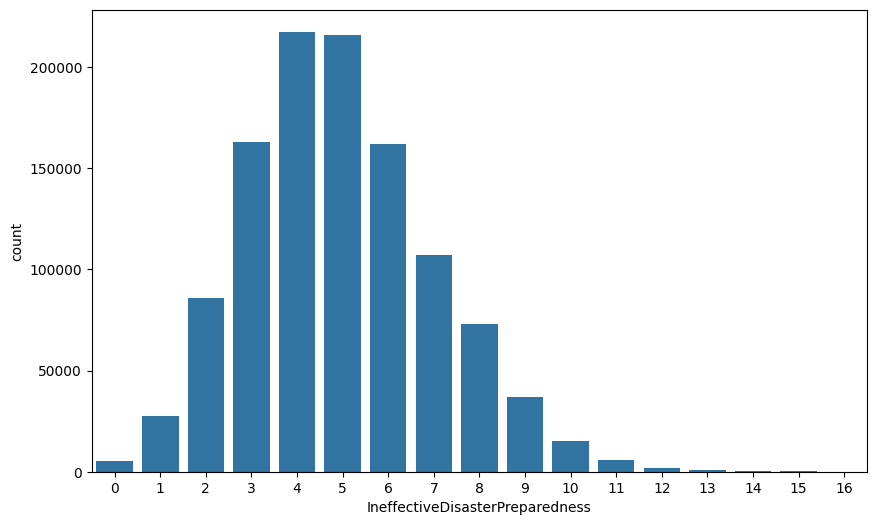

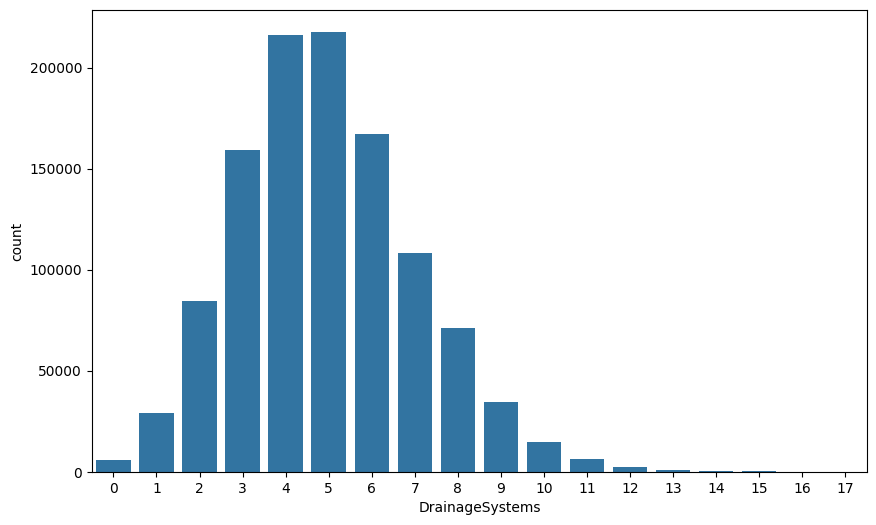

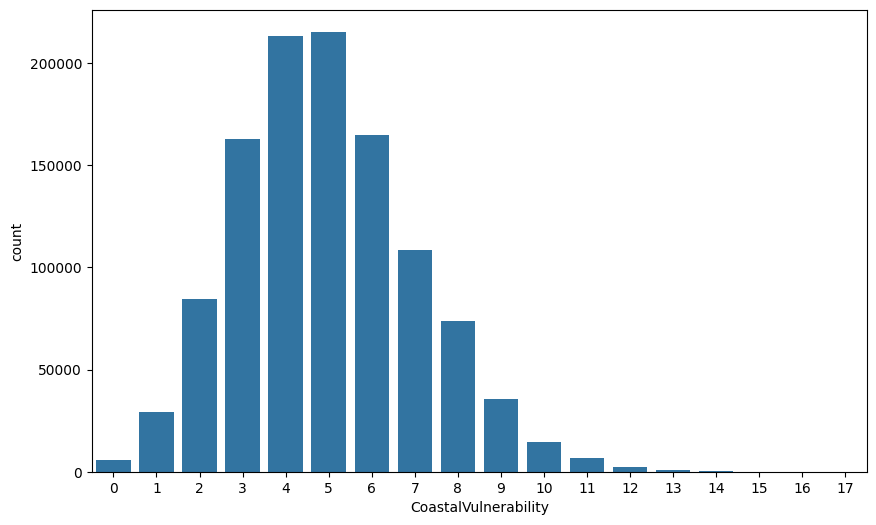

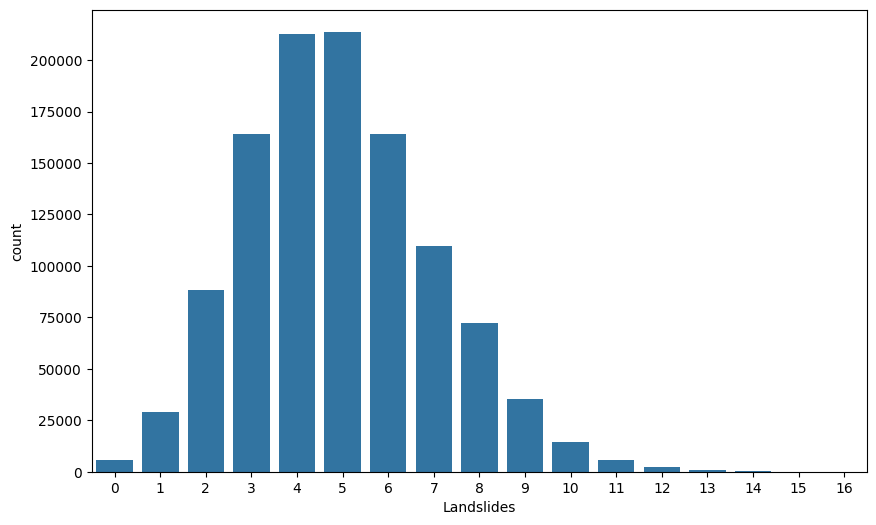

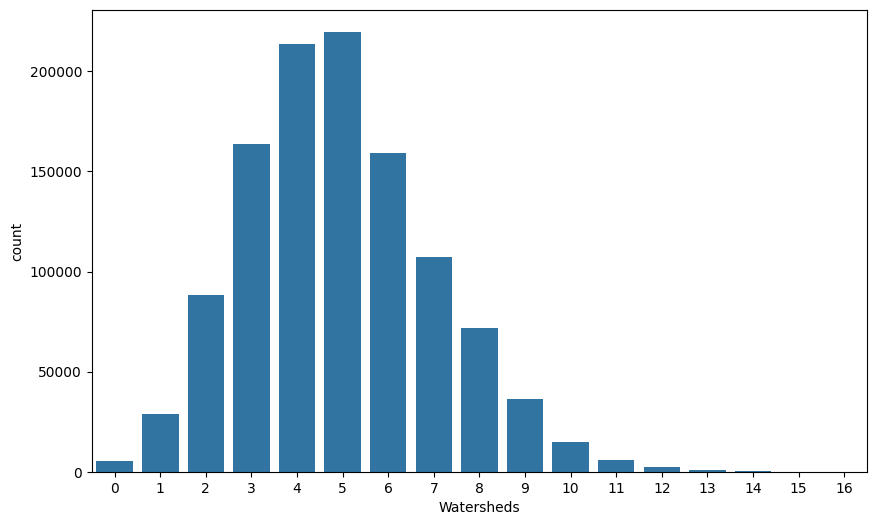

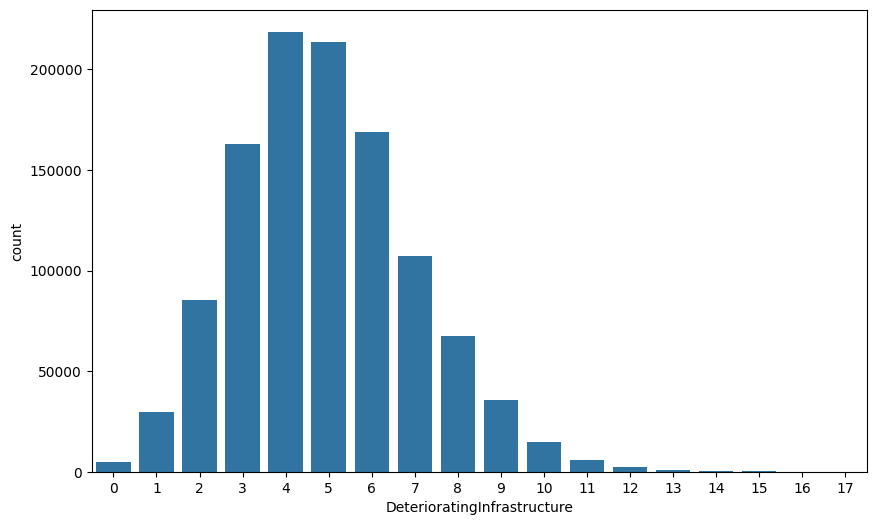

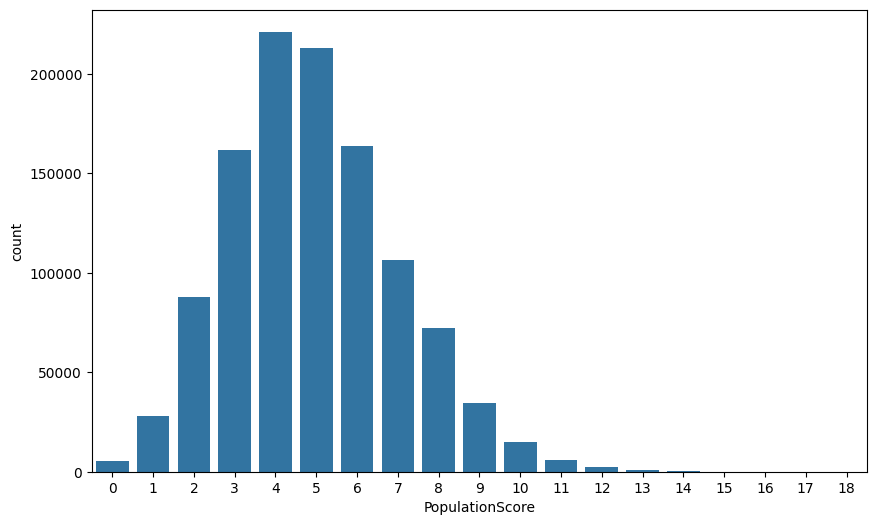

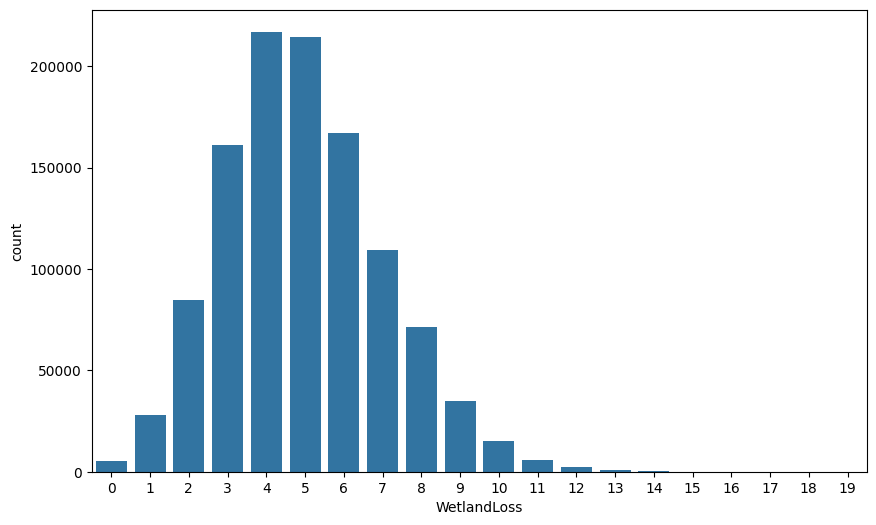

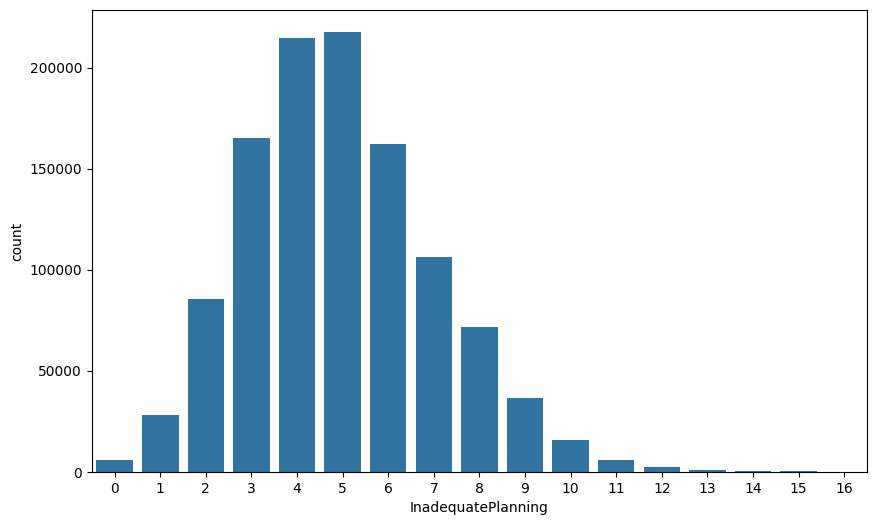

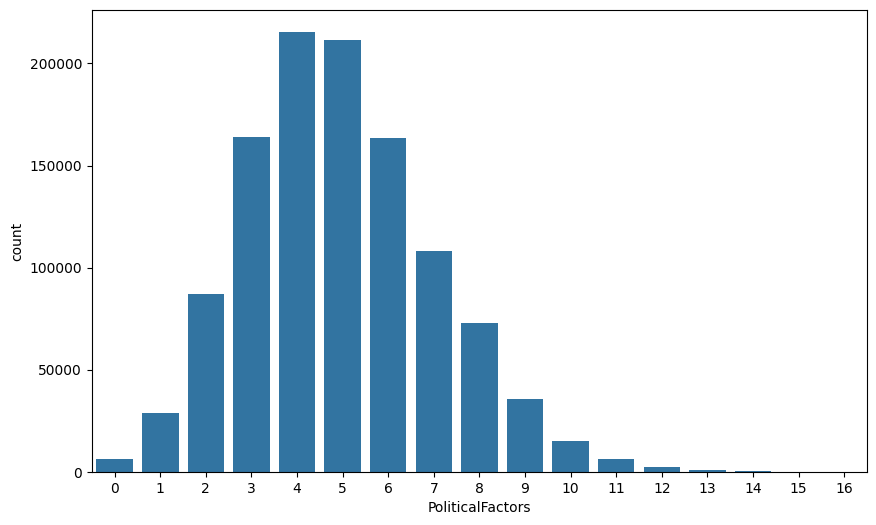

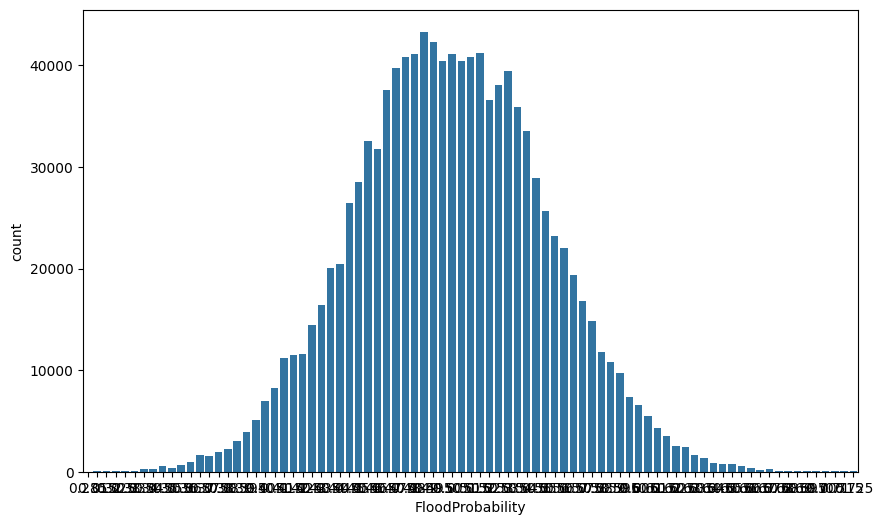

In [ ]:
#Barplot for each feature
for col in data.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(data[col].value_counts())
    plt.show()

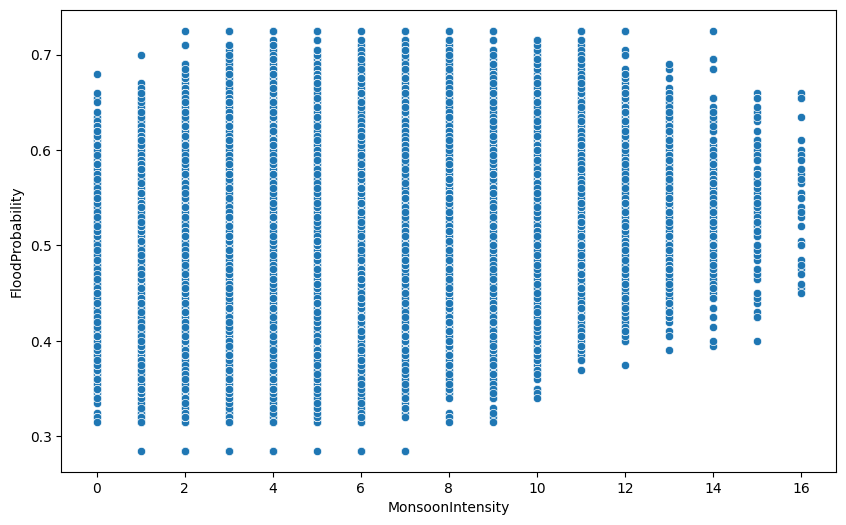

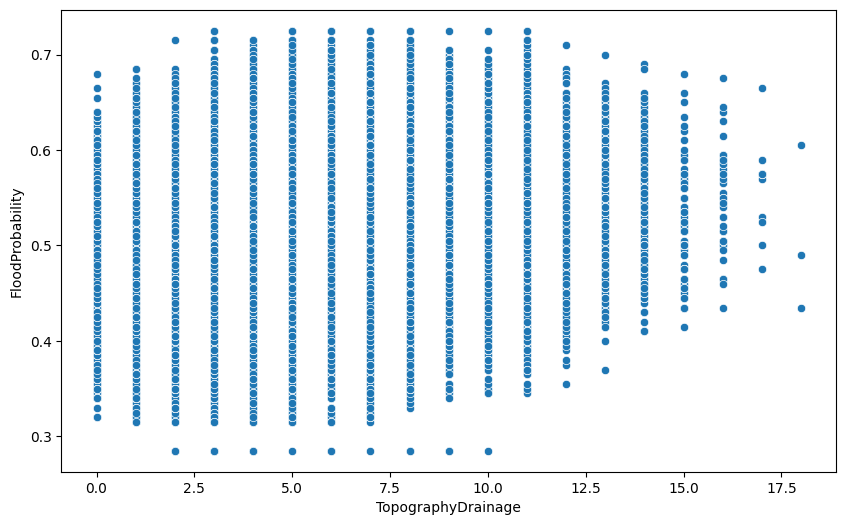

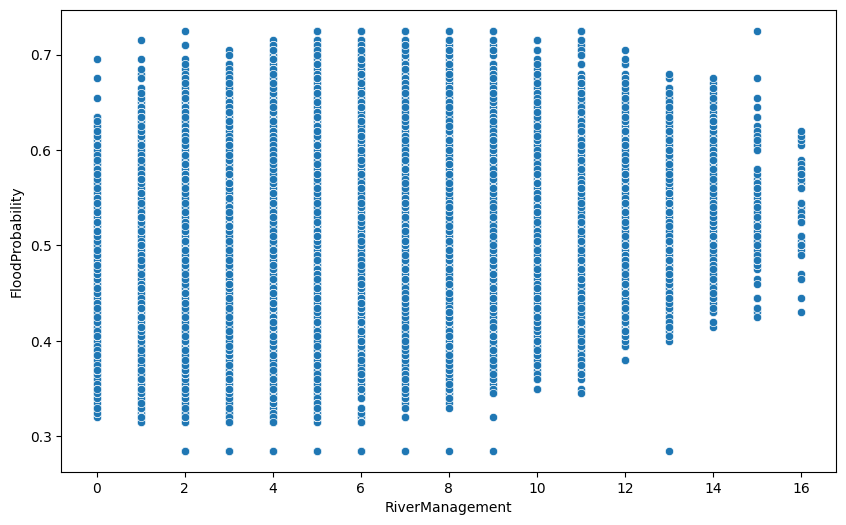

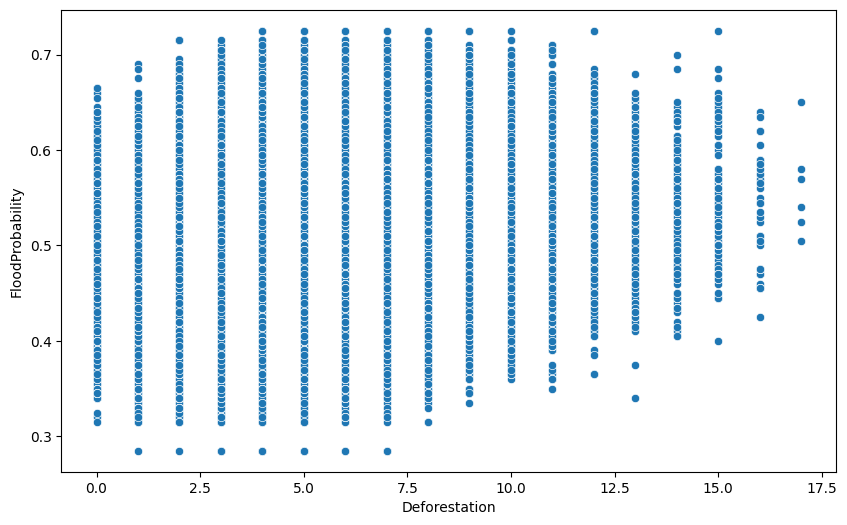

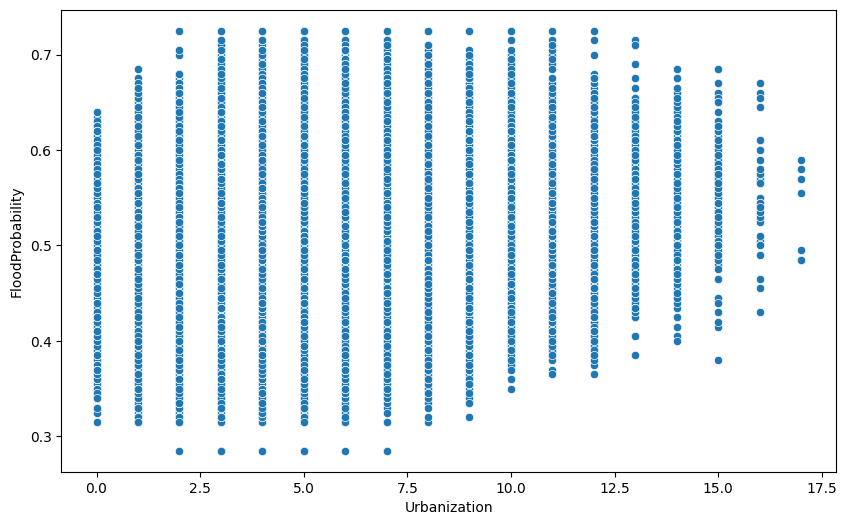

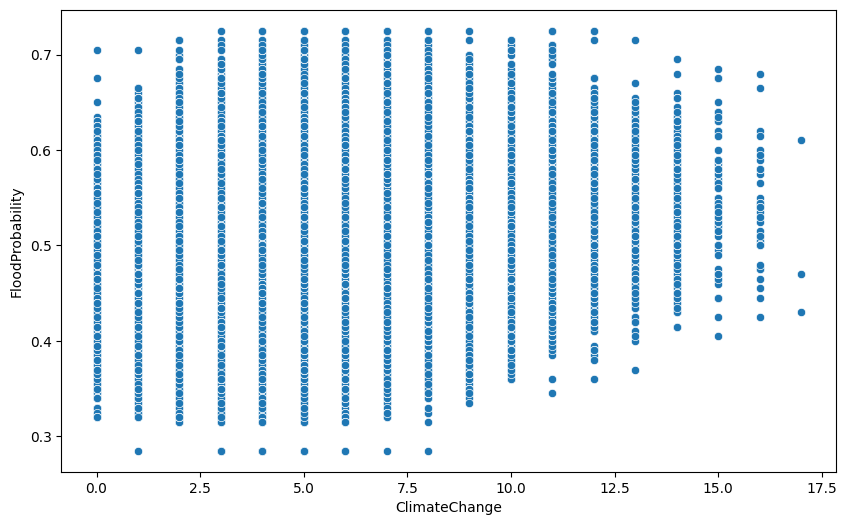

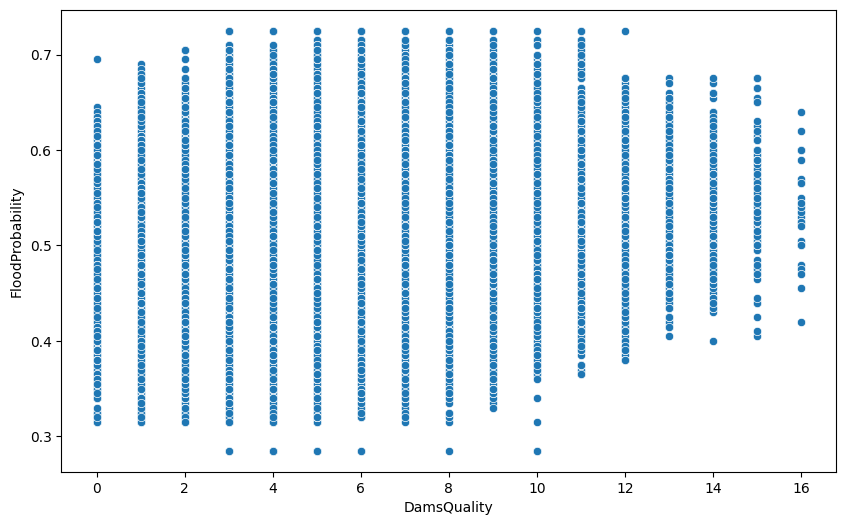

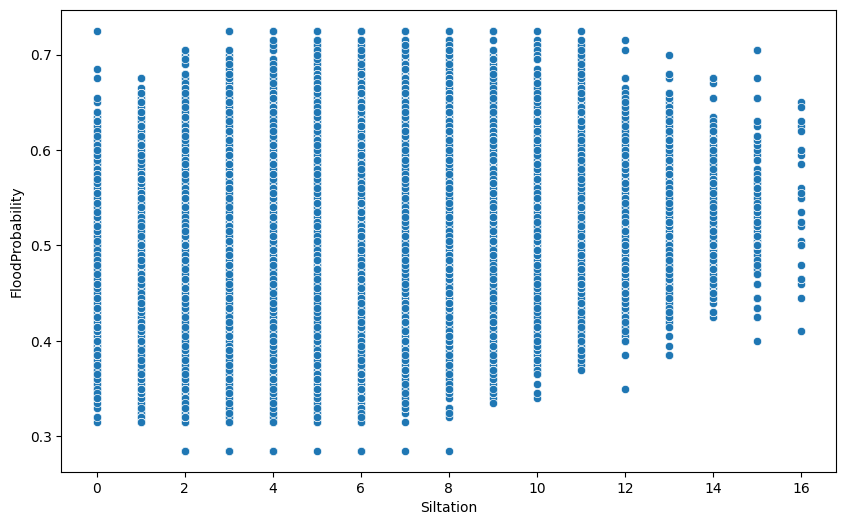

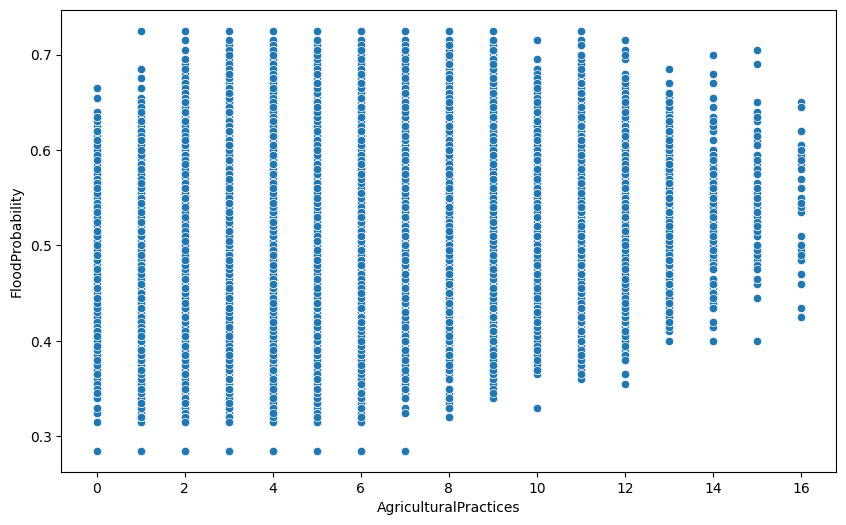

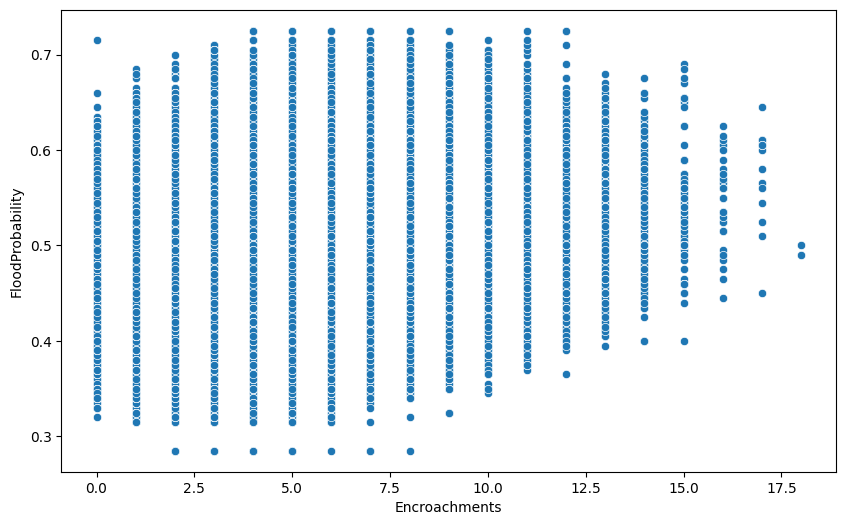

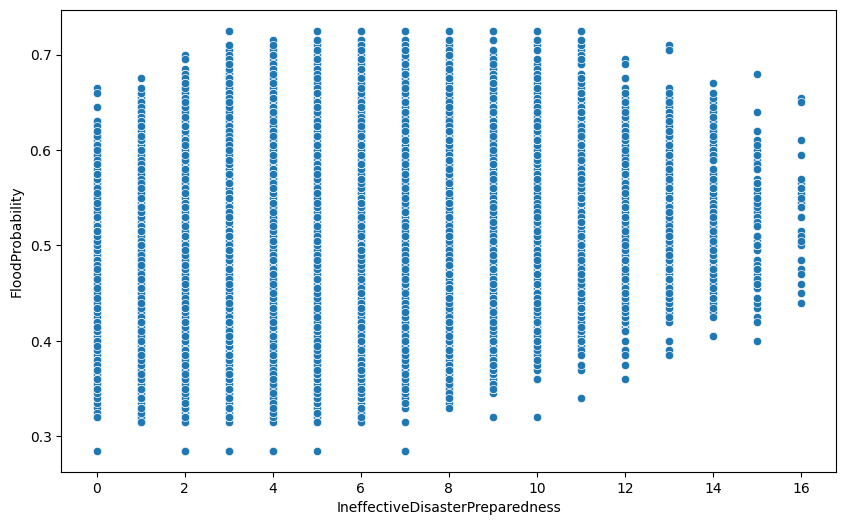

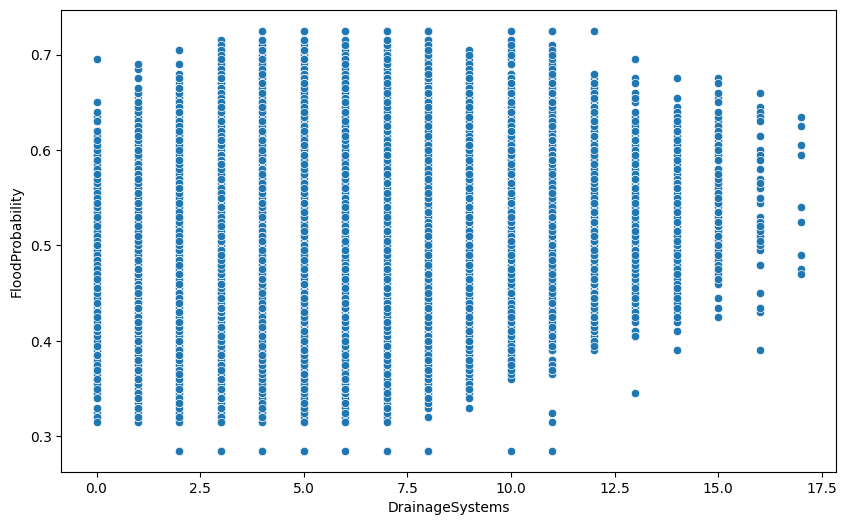

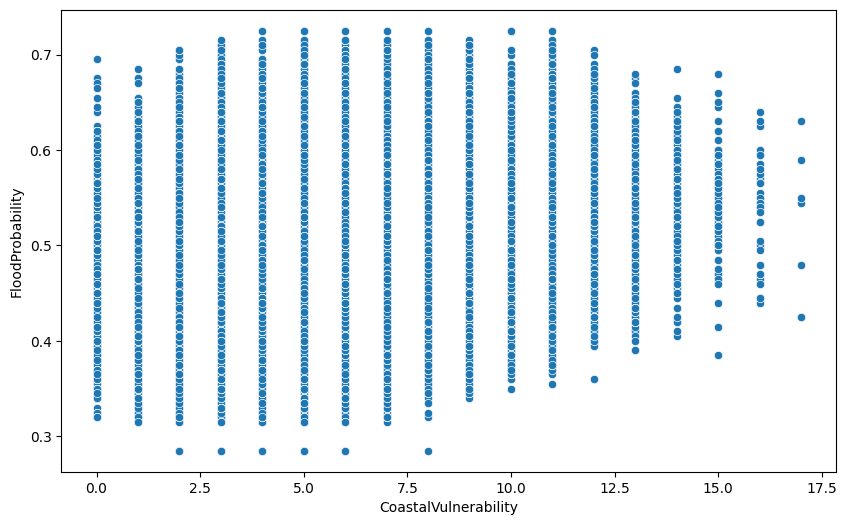

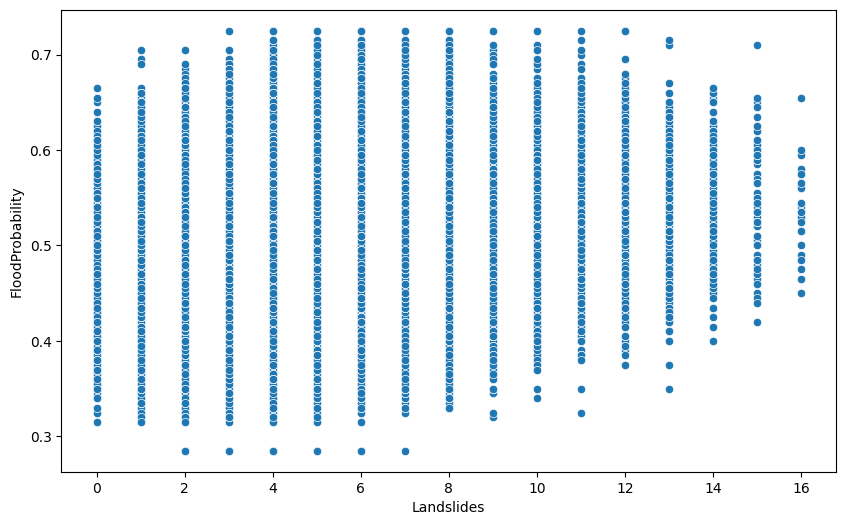

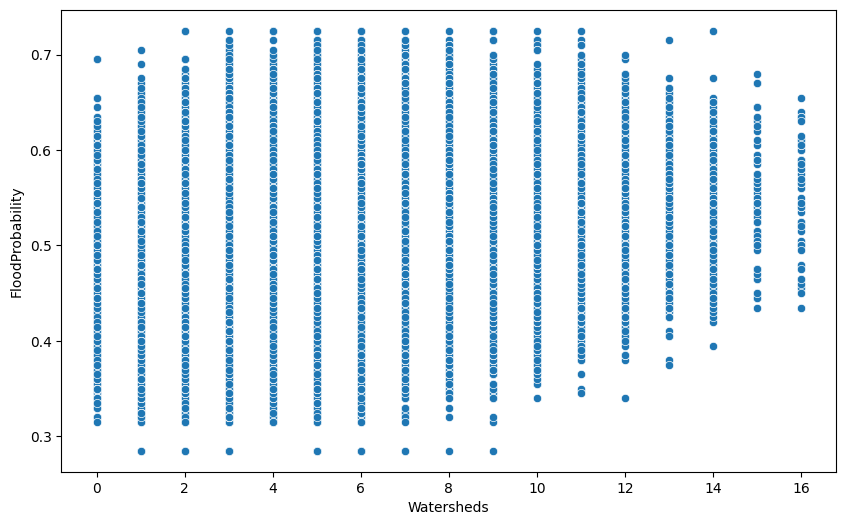

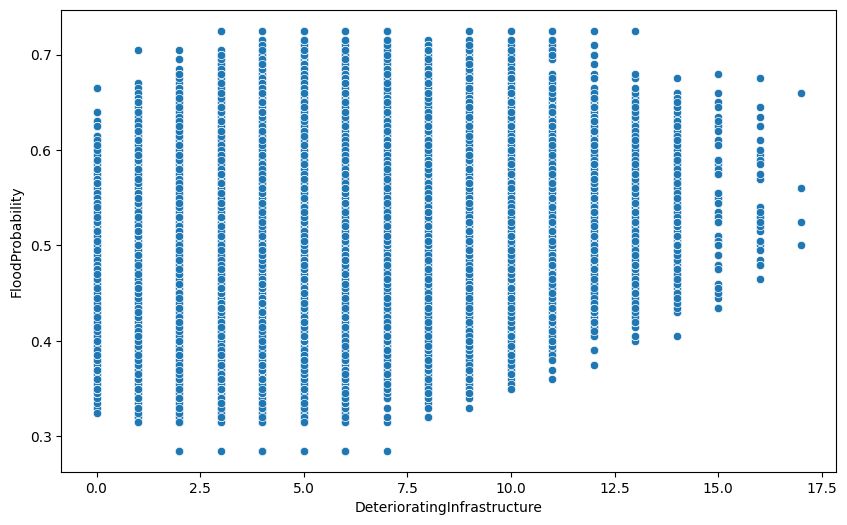

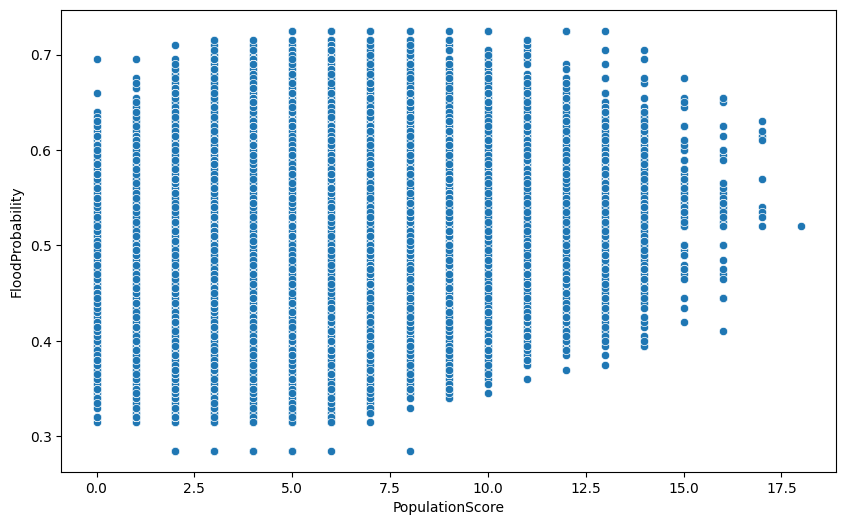

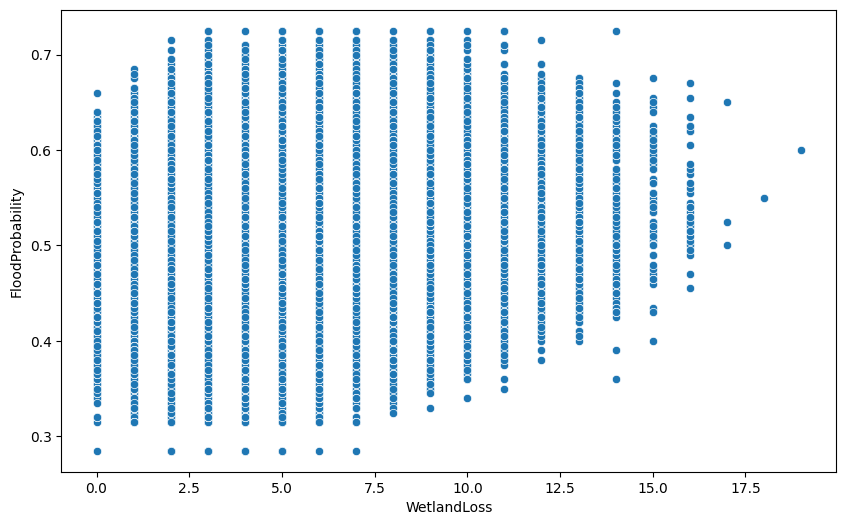

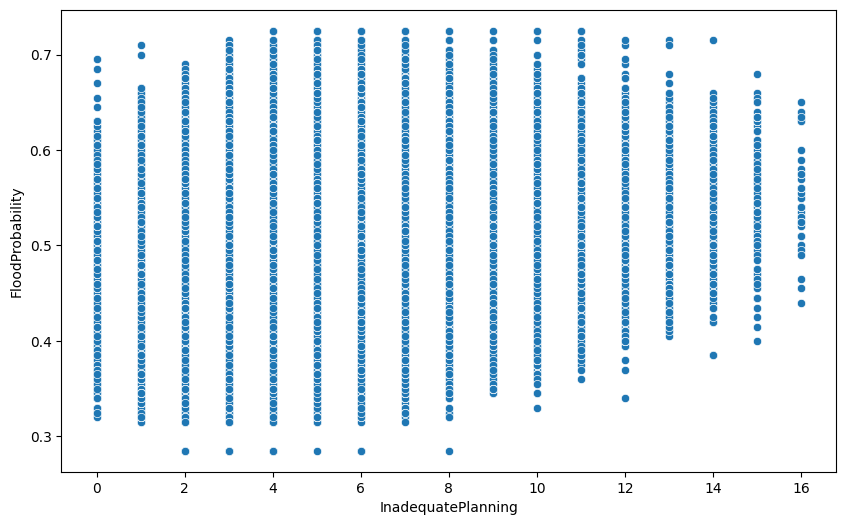

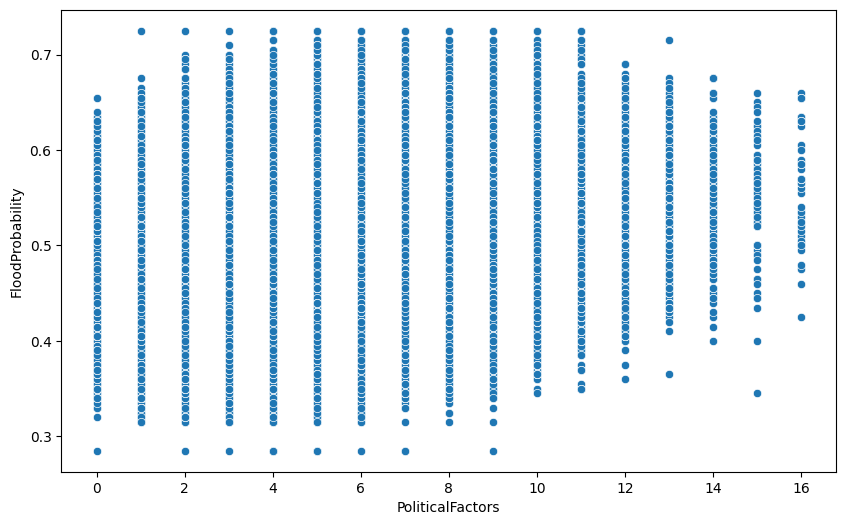

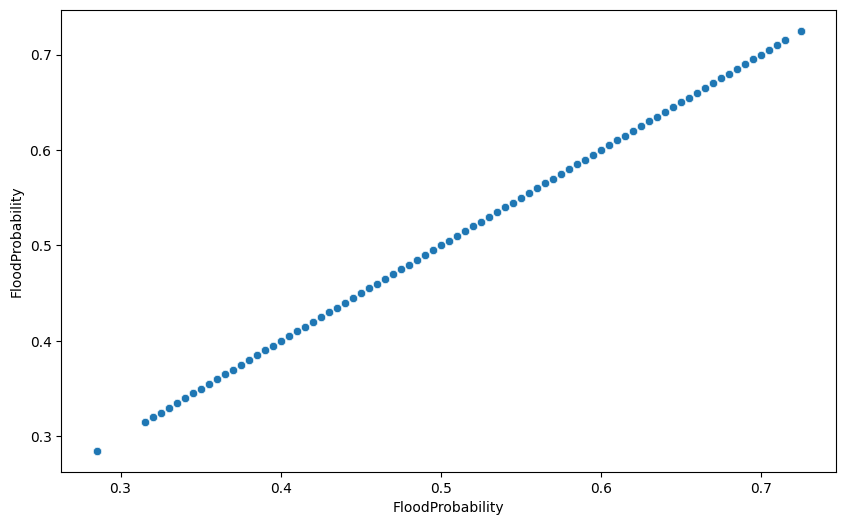

In [ ]:
#Scatterplot for each feature with Flood Probability
for col in data.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=col,y='FloodProbability',data=data)
    plt.show()

<Axes: >

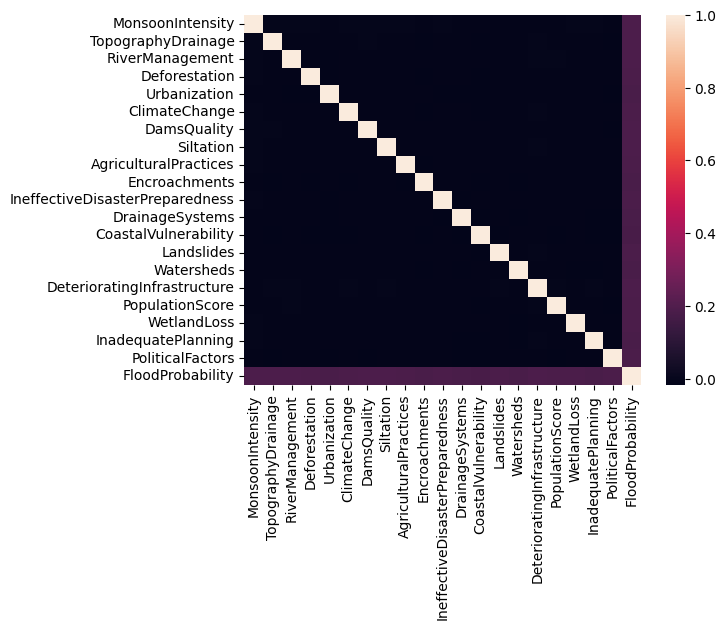

In [ ]:
#Correlation Matrix
sns.heatmap(data.corr())

There is no high correlation between these features

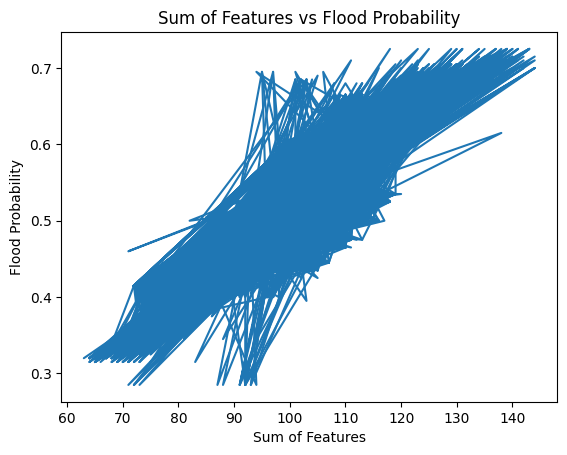

In [23]:
#Sum of Features VS Flood Probability
plt.rcParams['agg.path.chunksize'] = 10000
#The agg.path.chunksize parameter helps to control how paths are rendered in Matplotlib plots.
#When dealing with plots that have a large number of data points, increasing the agg.path.
#chunksize can help to improve performance and avoid issues with rendering.
#In this case, it's set to 10000, which means that paths with more than 10000 points will be broken down into smaller chunks for rendering.
plt.plot(data.drop("FloodProbability",axis=1).sum(axis=1),data['FloodProbability'])
plt.title('Sum of Features vs Flood Probability') # Add a descriptive title
plt.xlabel('Sum of Features') # Add a label for the x-axis
plt.ylabel('Flood Probability') # Add a label for the y-axis
plt.show()

#MLR Regression

In [12]:
X=data.drop('FloodProbability',axis=1)
y=data['FloodProbability']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn import linear_model
lin_reg=linear_model.LinearRegression()

In [15]:
# Forward sequential selection
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

def adjusted_r2_score(y_true, y_pred, **kwargs):
    n = len(y_true)
    p = kwargs.get('n_features', 0)  # Get number of features from kwargs
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Create a scorer from the custom function
adjusted_r2_scorer = make_scorer(adjusted_r2_score, greater_is_better=True, needs_proba=False)


sfs = SequentialFeatureSelector(lin_reg, k_features=20, forward=True, floating=True, verbose=2, scoring=adjusted_r2_scorer,cv=5)

Custom Function: The adjusted_r2_score function calculates the adjusted R-squared value given the true values (y_true), predicted values (y_pred), and the number of features (n_features). It extracts the number of features from the kwargs dictionary, which is automatically passed by make_scorer.

Scorer Creation: make_scorer converts the custom function into a scorer object that can be used by SequentialFeatureSelector. greater_is_better=True indicates that higher adjusted R-squared values are better.

SequentialFeatureSelector: When initializing SequentialFeatureSelector, pass the adjusted_r2_scorer to the scoring parameter. This tells the algorithm to use adjusted R-squared to evaluate feature subsets during the selection process.

needs_proba=False: This means your scoring function works with predicted class labels directly, not probabilities. Metrics like accuracy, precision, recall, and F1-score fall into this category.

In [ ]:
#Fitting
sfs.fit(X_train, y_train)



[2024-08-20 09:38:28] Features: 1/20 -- score: 0.03598565109814524
[2024-08-20 09:38:45] Features: 2/20 -- score: 0.07211780533694837
[2024-08-20 09:39:05] Features: 3/20 -- score: 0.10871080377394578
[2024-08-20 09:39:24] Features: 4/20 -- score: 0.14552655559340957
[2024-08-20 09:39:42] Features: 5/20 -- score: 0.1830413310228443
[2024-08-20 09:40:06] Features: 6/20 -- score: 0.22108846321494738
[2024-08-20 09:40:34] Features: 7/20 -- score: 0.2596769085372738
[2024-08-20 09:41:04] Features: 8/20 -- score: 0.29895306002735583
[2024-08-20 09:41:36] Features: 9/20 -- score: 0.338932868265493
[2024-08-20 09:42:13] Features: 10/20 -- score: 0.37958182953174446
[2024-08-20 09:42:52] Features: 11/20 -- score: 0.4211165988602555
[2024-08-20 09:43:35] Features: 12/20 -- score: 0.4636143851327654
[2024-08-20 09:44:22] Features: 13/20 -- score: 0.5071523023457692
[2024-08-20 09:45:13] Features: 14/20 -- score: 0.5518563601557382
[2024-08-20 09:46:05] Features: 15/20 -- score: 0.59784500752716

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          k_features=(20, 20),
                          scoring=make_scorer(adjusted_r2_score), verbose=2)

In [ ]:
# Extract the information
df1 = pd.DataFrame.from_dict(sfs.subsets_).T
df1

,feature_idx,cv_scores,avg_score,feature_names
1,"(15,)","[0.0364048280491851, 0.0371124259837281, 0.035...",0.035986,"(DeterioratingInfrastructure,)"
2,"(0, 15)","[0.07168754118855802, 0.07438929644541015, 0.0...",0.072118,"(MonsoonIntensity, DeterioratingInfrastructure)"
3,"(0, 6, 15)","[0.108023934039713, 0.11057357185768513, 0.109...",0.108711,"(MonsoonIntensity, DamsQuality, DeterioratingI..."
4,"(0, 1, 6, 15)","[0.1445236386889649, 0.1473753590464939, 0.145...",0.145527,"(MonsoonIntensity, TopographyDrainage, DamsQua..."
5,"(0, 1, 6, 7, 15)","[0.18249474817005473, 0.18277561885483773, 0.1...",0.183041,"(MonsoonIntensity, TopographyDrainage, DamsQua..."
6,"(0, 1, 6, 7, 15, 16)","[0.22168003828445593, 0.2213806634589336, 0.22...",0.221088,"(MonsoonIntensity, TopographyDrainage, DamsQua..."
7,"(0, 1, 2, 6, 7, 15, 16)","[0.2597826629344673, 0.25901000977130706, 0.25...",0.259677,"(MonsoonIntensity, TopographyDrainage, RiverMa..."
8,"(0, 1, 2, 6, 7, 13, 15, 16)","[0.29911145757304114, 0.2990031084270275, 0.29...",0.298953,"(MonsoonIntensity, TopographyDrainage, RiverMa..."
9,"(0, 1, 2, 6, 7, 13, 15, 16, 19)","[0.339784049201279, 0.3383874069731587, 0.3387...",0.338933,"(MonsoonIntensity, TopographyDrainage, RiverMa..."
10,"(0, 1, 2, 5, 6, 7, 13, 15, 16, 19)","[0.379661788980295, 0.3781978426931264, 0.3808...",0.379582,"(MonsoonIntensity, TopographyDrainage, RiverMa..."


In [ ]:
#Backward Selection
sfs = SequentialFeatureSelector(lin_reg, k_features=(1,20), forward=False, floating=True, verbose=2, scoring=adjusted_r2_scorer,cv=5)

In [ ]:
#Fitting
sfs.fit(X_train, y_train)



[2024-08-20 09:53:06] Features: 19/1 -- score: 0.7940345905761541
[2024-08-20 09:54:25] Features: 18/1 -- score: 0.7434657610075265
[2024-08-20 09:56:04] Features: 17/1 -- score: 0.6936929125514768
[2024-08-20 09:57:40] Features: 17/1 -- score: 0.693763905729398
[2024-08-20 09:58:44] Features: 16/1 -- score: 0.6453332872642331
[2024-08-20 09:59:41] Features: 15/1 -- score: 0.5980163142570183
[2024-08-20 10:00:42] Features: 14/1 -- score: 0.5519942012972178
[2024-08-20 10:01:40] Features: 13/1 -- score: 0.5072842531216548
[2024-08-20 10:02:33] Features: 12/1 -- score: 0.4634235288945471
[2024-08-20 10:03:33] Features: 12/1 -- score: 0.46355312411213534
[2024-08-20 10:04:16] Features: 11/1 -- score: 0.42113621812793306
[2024-08-20 10:04:55] Features: 10/1 -- score: 0.3795343405908821
[2024-08-20 10:05:49] Features: 10/1 -- score: 0.37958182953174446
[2024-08-20 10:06:26] Features: 9/1 -- score: 0.338932868265493
[2024-08-20 10:07:01] Features: 8/1 -- score: 0.29895306002735583
[2024-08-

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          forward=False, k_features=(1, 20),
                          scoring=make_scorer(adjusted_r2_score), verbose=2)

In [ ]:
# Extract the information
df2 = pd.DataFrame.from_dict(sfs.subsets_).T
df2

,feature_idx,cv_scores,avg_score,feature_names
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8457395856896008, 0.8446826920689715, 0.843...",0.845001,"(MonsoonIntensity, TopographyDrainage, RiverMa..."
19,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7950195707863758, 0.7940414270216496, 0.792...",0.794035,"(TopographyDrainage, RiverManagement, Deforest..."
18,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7446355595363299, 0.7430781894628908, 0.742...",0.743466,"(TopographyDrainage, RiverManagement, Deforest..."
17,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.6946872614271372, 0.6944446787609169, 0.692...",0.693764,"(TopographyDrainage, RiverManagement, Deforest..."
16,"(1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 1...","[0.6460720307495684, 0.6460239519109177, 0.644...",0.645333,"(TopographyDrainage, RiverManagement, Deforest..."
15,"(1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, ...","[0.5982353686971761, 0.5988894319277984, 0.597...",0.598016,"(TopographyDrainage, RiverManagement, Deforest..."
14,"(1, 2, 3, 4, 6, 7, 10, 12, 13, 14, 15, 16, 17,...","[0.5525469604252924, 0.5531246354425778, 0.549...",0.551994,"(TopographyDrainage, RiverManagement, Deforest..."
13,"(1, 2, 3, 4, 6, 7, 10, 13, 14, 15, 16, 17, 19)","[0.5073603660800947, 0.5080984493631939, 0.505...",0.507284,"(TopographyDrainage, RiverManagement, Deforest..."
12,"(0, 1, 2, 3, 6, 7, 13, 14, 15, 16, 17, 19)","[0.463123860492445, 0.46379314500843627, 0.461...",0.463553,"(MonsoonIntensity, TopographyDrainage, RiverMa..."
11,"(0, 1, 2, 3, 6, 7, 13, 15, 16, 17, 19)","[0.4207356271360915, 0.42122925211937845, 0.41...",0.421136,"(MonsoonIntensity, TopographyDrainage, RiverMa..."


Based on the above forward and backward evaluation techniques considering all the 20 independent features is useful for Multiple regression

In [16]:
#Fitting the model
ln_reg=lin_reg.fit(X_train,y_train)

In [17]:
# Extract coefficients and intercept
coefficients = ln_reg.coef_
intercept = ln_reg.intercept_

# Calculate R-squared
r_squared = ln_reg.score(X_train, y_train)

# Create a DataFrame for the output table
results_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
results_df.loc['Intercept', 'Coefficient'] = intercept
results_df['R-squared'] = r_squared

# Print the table
print(results_df)

                                   Feature  Coefficient  R-squared
0                         MonsoonIntensity     0.005620   0.845054
1                       TopographyDrainage     0.005648   0.845054
2                          RiverManagement     0.005672   0.845054
3                            Deforestation     0.005684   0.845054
4                             Urbanization     0.005660   0.845054
5                            ClimateChange     0.005662   0.845054
6                              DamsQuality     0.005653   0.845054
7                                Siltation     0.005637   0.845054
8                    AgriculturalPractices     0.005631   0.845054
9                            Encroachments     0.005656   0.845054
10         IneffectiveDisasterPreparedness     0.005643   0.845054
11                         DrainageSystems     0.005640   0.845054
12                    CoastalVulnerability     0.005668   0.845054
13                              Landslides     0.005645   0.84

In [ ]:
np.round(results_df["Coefficient"].values,3)

array([ 0.006,  0.006,  0.006,  0.006,  0.006,  0.006,  0.006,  0.006,
        0.006,  0.006,  0.006,  0.006,  0.006,  0.006,  0.006,  0.006,
        0.006,  0.006,  0.006,  0.006, -0.053])

The MLR equation for the above fitted model is
y=-0.053+ 0.006X1 + 0.006X2 + 0.006X3 + 0.006X4 + 0.006X5 + 0.006X6 + 0.006X7 + 0.006X8 + 0.006X9 + 0.006X10 +...+0.006X20
       

In the above model, the intercept term is -0.053. This value represents the predicted probability when all feature values are zero. The regression coefficient of 0.006 signifies that for each unit increase in a particular feature, while keeping all other features constant, the predicted probability increases by 0.006

In [18]:
#Predicting
pred=ln_reg.predict(X_test)

In [19]:
#R-squared value
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8445269325421907

The above R-squared value of 0.85 indicates that 85% of variation in the dependent variable in the test data is explained by our model

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

0.0004037218777419387

MSE = 1/n * Σ(yi - ŷi)^2

In [24]:
import statsmodels.api as sm
#Using statsmodels to check for normality of residuals, heteroscedasticity, and p-values for significance testing.
# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print summary (provides p-values, R-squared, etc.)
print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.439e+05
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:19:13   Log-Likelihood:             2.2256e+06
No. Observations:              894365   AIC:                        -4.451e+06
Df Residuals:                  894344   BIC:                        -4.451e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [44]:
Test_pred=pd.concat([test['id'],pd.DataFrame(ln_reg.predict(test.drop('id',axis=1)))],axis=1)

In [45]:
Test_pred.head()

,id,0
0,1117957,0.573589
1,1117958,0.455236
2,1117959,0.454785
3,1117960,0.466230
4,1117961,0.466093


In [55]:
Test_pred = Test_pred.rename(columns={'id': 'id', 0: 'FloodProbability'})

In [56]:
Test_pred.head()

,id,FloodProbability
0,1117957,0.573589
1,1117958,0.455236
2,1117959,0.454785
3,1117960,0.466230
4,1117961,0.466093


In [58]:
Test_pred.to_csv('Test.csv', index=False)

# Logistic Regression For predicting pobabilities

Here i will use logistic regression by replacing the probability values in the train and test data by replacing the probability values greater than 0.5 as "Flood" and Less than 0.5 as "No Flood". After fitting the model Logistic regression will predict probabilities for the event and that will be used for evaluation.

In [ ]:
data1=data.copy()

In [ ]:
#Create a new column flood status where Flood Probability > 0.5 is Flood and less than is considered No Flood
data1['Floodstatus'] = data1['FloodProbability']
for i in range(len(data1['Floodstatus'])):
  if data1['Floodstatus'][i]>=0.5:
    data1['Floodstatus'][i]='Flood'
  else:
    data1['Floodstatus'][i]='No_Flood'

<ipython-input-11-64cae7df5f78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Floodstatus'][i]='No_Flood'
<ipython-input-11-64cae7df5f78>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No_Flood' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data1['Floodstatus'][i]='No_Flood'


In [ ]:
data1.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,Floodstatus
0,5,8,5,8,6,4,4,3,3,4,...,3,3,5,4,7,5,7,3,0.445,No_Flood
1,6,7,4,4,8,8,3,5,4,6,...,2,0,3,5,3,3,4,3,0.450,No_Flood
2,6,5,6,7,3,7,1,5,4,5,...,3,7,5,6,8,2,3,3,0.530,Flood
3,3,4,6,5,4,8,4,7,6,8,...,4,7,4,4,6,5,7,5,0.535,Flood
4,5,3,2,6,4,4,3,3,3,3,...,2,6,6,4,1,2,3,5,0.415,No_Flood


In [ ]:
X=data1.drop(['Floodstatus'],axis=1)
y=data1['Floodstatus']

In [ ]:
X.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
y.value_counts()

,count
Floodstatus,
Flood,609879
No_Flood,508078


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train_FloodProbability=X_train['FloodProbability']
X_test_FloodProbability=X_test['FloodProbability']
X_train = X_train.drop('FloodProbability',axis=1)
X_test = X_test.drop('FloodProbability',axis=1)

In [ ]:
X_train.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [ ]:
X_test.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [ ]:
# Sequential selection
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
from sklearn.model_selection import StratifiedKFold #Stratified Cross val
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#Forward Selection
sfs = SequentialFeatureSelector(log_reg, k_features=20, forward=True, floating=False, verbose=2, scoring='accuracy',cv=skf)
#Fitting
sfs=sfs.fit(X_train, y_train)


[2024-08-22 17:10:32] Features: 1/20 -- score: 0.5707200080504045
[2024-08-22 17:15:58] Features: 2/20 -- score: 0.5906436410190471
[2024-08-22 17:21:16] Features: 3/20 -- score: 0.6072956790572082
[2024-08-22 17:26:32] Features: 4/20 -- score: 0.6214643909365862
[2024-08-22 17:31:41] Features: 5/20 -- score: 0.6348157631392104
[2024-08-22 17:36:42] Features: 6/20 -- score: 0.6479345681013904
[2024-08-22 17:41:06] Features: 7/20 -- score: 0.6599061904256092
[2024-08-22 17:45:25] Features: 8/20 -- score: 0.6717995449285248
[2024-08-22 17:49:51] Features: 9/20 -- score: 0.6833965998222202
[2024-08-22 17:54:00] Features: 10/20 -- score: 0.6947208354530867
[2024-08-22 17:57:50] Features: 11/20 -- score: 0.7060204726258296
[2024-08-22 18:01:20] Features: 12/20 -- score: 0.7170662984352025
[2024-08-22 18:04:40] Features: 13/20 -- score: 0.7284128963007273
[2024-08-22 18:07:34] Features: 14/20 -- score: 0.7404448966585231
[2024-08-22 18:10:07] Features: 15/20 -- score: 0.7534161108719595
[20

In [ ]:
# Extract the information
df1 = pd.DataFrame.from_dict(sfs.subsets_).T
df1

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)","[0.5693480849541295, 0.5706283228883062, 0.570...",0.57072,"(TopographyDrainage,)"
2,"(1, 6)","[0.591318980505722, 0.5907822868739273, 0.5892...",0.590644,"(TopographyDrainage, DamsQuality)"
3,"(1, 6, 7)","[0.6073135688449347, 0.6085826256617823, 0.605...",0.607296,"(TopographyDrainage, DamsQuality, Siltation)"
4,"(1, 6, 7, 10)","[0.6227826446696818, 0.6213290994169047, 0.619...",0.621464,"(TopographyDrainage, DamsQuality, Siltation, I..."
5,"(1, 6, 7, 10, 15)","[0.6356521107154238, 0.635601795687443, 0.6337...",0.634816,"(TopographyDrainage, DamsQuality, Siltation, I..."
6,"(0, 1, 6, 7, 10, 15)","[0.6479848831293711, 0.6481693715653005, 0.647...",0.647935,"(MonsoonIntensity, TopographyDrainage, DamsQua..."
7,"(0, 1, 5, 6, 7, 10, 15)","[0.6603735611299637, 0.6595797017996008, 0.660...",0.659906,"(MonsoonIntensity, TopographyDrainage, Climate..."
8,"(0, 1, 3, 5, 6, 7, 10, 15)","[0.672885231421176, 0.6723094038787296, 0.6714...",0.6718,"(MonsoonIntensity, TopographyDrainage, Defores..."
9,"(0, 1, 3, 5, 6, 7, 10, 13, 15)","[0.6844353256220894, 0.6831215443359255, 0.683...",0.683397,"(MonsoonIntensity, TopographyDrainage, Defores..."
10,"(0, 1, 2, 3, 5, 6, 7, 10, 13, 15)","[0.6962761288735584, 0.6951077021126721, 0.693...",0.694721,"(MonsoonIntensity, TopographyDrainage, RiverMa..."


From the above fitted model we get the best model if we fit with all the independent features

In [ ]:
X_train.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [ ]:
y_train.value_counts()

,count
Floodstatus,
Flood,487741
No_Flood,406624


In [ ]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred_prob=log_reg.predict_proba(X_test)

In [ ]:
pred_prob

array([[3.49728976e-01, 6.50271024e-01],
       [8.36436955e-02, 9.16356305e-01],
       [9.99036082e-01, 9.63917807e-04],
       ...,
       [9.68410214e-01, 3.15897858e-02],
       [1.78535859e-01, 8.21464141e-01],
       [2.53742130e-01, 7.46257870e-01]])

In [ ]:
prob=np.max(pred_prob,axis=1)

In [ ]:
len(prob)

223592

In [ ]:
prob

array([0.65027102, 0.9163563 , 0.99903608, ..., 0.96841021, 0.82146414,
       0.74625787])

In [ ]:
X_test_FloodProbability

,FloodProbability
54962,0.465
125926,0.515
686093,0.575
979303,0.445
123875,0.470
...,...
386985,0.495
106436,0.500
470862,0.535
624397,0.490


In [ ]:
from sklearn.metrics import r2_score
r2_score(X_test_FloodProbability,prob)

-52.51726548707425

An R-squared value of -52 is extremely low and indicates a very poor fit of the model to the data.

The traditional formula for R-squared suggests it should be between 0 and 1, it is indeed possible to get negative values in certain situations. This happens when the model you're using fits the data worse than a simple horizontal line (predicting the mean of the target variable).

R-squared is typically calculated as:

R^2 = 1 - (SSres / SStot)

Where:

SSres is the sum of squared residuals (the difference between predicted and actual values).
SStot is the total sum of squares (the difference between actual values and the mean of the target variable).

Negative R-squared:

If your model is very poor, the sum of squared residuals (SSres) can become larger than the total sum of squares (SStot). This results in a negative value inside the parentheses, and ultimately a negative R-squared.

# Decision Tree

In [ ]:
X=data.drop('FloodProbability',axis=1)
y=data['FloodProbability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()

In [ ]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred=dt_reg.predict(X_test)

In [ ]:
pred

array([0.55 , 0.55 , 0.445, ..., 0.46 , 0.47 , 0.645])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.05379032401677475

Perfomance of Decision Tree is very poor.